# Proteínas de DUD y DEKOIS2

In [1]:
import os
import numpy as np
import pandas as pd

###  Carga de los datos

In [2]:
df_targets = pd.read_json('targets_table.json')
df_targets.index.name = 'accession'
targets_pdb = pd.read_json('targets_PDB_IDS.json')
targets_pdb.index.name = 'accession'

## Tabla *df_prot_targets*

La tabla `df_prot_targets` contiene información de las proteínas que se encuentran en los sets *DUD 2006* y *DEKOIS2.0*.

- La primer columna de la tabla corresponde al _**accession number**_ de cada proteína, establecido como identificador único. La columna **name** corresponde al acrónimo dado a la proteína, y **long_name** al nombre completo de la proteína como aparece en *UNIPROT*.

- Las columnas **DUD** y **DEKOIS2** indican con un *1* o un *0* si la proteína se encuentra o no, respectivamente, en dicho set.

- Finalmente, las columnas **pdb_ids** y **n_crystals** indican cuántos y qué cristales hay disponibles en el PDB de dicha proteína.

In [3]:
df_prot_targets = pd.merge(df_targets, targets_pdb, left_index=True, right_index=True)
df_prot_targets.head()

,name,long_name,DUD,DEKOIS2,pdb_ids,n_crystals
accession,,,,,,
O14965,AURKA,Aurora kinase A,0,1,"[1MQ4, 1MUO, 1OL5, 1OL6, 1OL7, 2BMC, 2C6D, 2C6...",156
O15530,PDK1,3-phosphoinositide-dependent protein kinase 1,0,1,"[1H1W, 1OKY, 1OKZ, 1UU3, 1UU7, 1UU8, 1UU9, 1UV...",68
O76074,PDE5,"cGMP-specific 3',5'-cyclic phosphodiesterase",0,1,"[1RKP, 1T9R, 1T9S, 1TBF, 1UDT, 1UDU, 1UHO, 1XO...",38
P00374,DHFR,Dihydrofolate reductase,1,1,"[1BOZ, 1DHF, 1DLR, 1DLS, 1DRF, 1HFP, 1HFQ, 1HF...",79
P00533,EGFR,Epidermal growth factor receptor,1,1,"[1DNQ, 1DNR, 1IVO, 1M14, 1M17, 1MOX, 1NQL, 1XK...",213


### Número de porteínas por dataset
- El número de proteínas por dataset es:
    - 21 para **DUD**; **20 únicos**.
        - De los cuales ER_agonist y ER_antagonist son dos conformaciones de la misma proteína.
    - 81 para **DEKOIS**: **79 únicos**.
        - HIVRT y HIVPR es el mismo gen que codifica a una poliproteína del HIV-1 que incluye a la transcriptasa reversa y a la proteasa del HIV.
        - PYGL-in y PYGL-out son dos conformaciones de la misma proteína (glucógeno fosforilasa)


In [4]:
len_dud = len(df_prot_targets[df_prot_targets['DUD'] == 1])
print(f'Número de proteínas en DUD: {len_dud}')

len_dekois = len(df_prot_targets[df_prot_targets['DEKOIS2'] == 1])
print(f'Número de proteínas en DEKOIS: {len_dekois}')

Número de proteínas en DUD: 20
Número de proteínas en DEKOIS: 79


### Ejemplo: Proteína CDK2

In [5]:
df_prot_targets[df_prot_targets['name'] == 'CDK2']

,name,long_name,DUD,DEKOIS2,pdb_ids,n_crystals
accession,,,,,,
P24941,CDK2,CDK2_HUMAN Cyclin-dependent kinase 2 OS=Homo s...,1,1,"[1AQ1, 1B38, 1B39, 1BUH, 1CKP, 1DI8, 1DM2, 1E1...",416


## Proteínas presentes en DUD y en DEKOIS2

In [6]:
df_prot_targets[(df_prot_targets['DUD'] == 1) & (df_prot_targets['DEKOIS2'] == 1)]

,name,long_name,DUD,DEKOIS2,pdb_ids,n_crystals
accession,,,,,,
P00374,DHFR,Dihydrofolate reductase,1,1,"[1BOZ, 1DHF, 1DLR, 1DLS, 1DRF, 1HFP, 1HFQ, 1HF...",79
P00533,EGFR,Epidermal growth factor receptor,1,1,"[1DNQ, 1DNR, 1IVO, 1M14, 1M17, 1MOX, 1NQL, 1XK...",213
P00742,FXa,FA10_HUMAN Coagulation factor X OS=Homo sapien...,1,1,"[1C5M, 1EZQ, 1F0R, 1F0S, 1FAX, 1FJS, 1FXY, 1G2...",146
P04150,GR,Glucocorticoid receptor,1,1,"[1M2Z, 1NHZ, 1P93, 3BQD, 3CLD, 3E7C, 3H52, 3K2...",43
P10275,AR,Androgen receptor,1,1,"[1E3G, 1GS4, 1T5Z, 1T63, 1T65, 1XJ7, 1XOW, 1XQ...",82
P11362,FGFR1,Fibroblast growth factor receptor 1,1,1,"[1AGW, 1CVS, 1EVT, 1FGI, 1FGK, 1FQ9, 1XR0, 2CR...",66
P12821,ACE,Angiotensin-converting enzyme,1,1,"[1O86, 1O8A, 1UZE, 1UZF, 2C6F, 2C6N, 2IUL, 2IU...",47
P24941,CDK2,CDK2_HUMAN Cyclin-dependent kinase 2 OS=Homo s...,1,1,"[1AQ1, 1B38, 1B39, 1BUH, 1CKP, 1DI8, 1DM2, 1E1...",416


In [7]:
df_prot_targets[df_prot_targets.DEKOIS2 == 1].sort_values('n_crystals', ascending=False).head(50)

,name,long_name,DUD,DEKOIS2,pdb_ids,n_crystals
accession,,,,,,
P24941,CDK2,CDK2_HUMAN Cyclin-dependent kinase 2 OS=Homo s...,1,1,"[1AQ1, 1B38, 1B39, 1BUH, 1CKP, 1DI8, 1DM2, 1E1...",416
P00734,Thrombin,Prothrombin,0,1,"[1A2C, 1A3B, 1A3E, 1A46, 1A4W, 1A5G, 1A61, 1AB...",392
P03366,HIV1PR,Gag-Pol polyprotein,0,1,"[1A9M, 1AJV, 1AJX, 1AXA, 1BQM, 1BQN, 1D4H, 1D4...",337
P07900,HSP90,Heat shock protein HSP 90-alpha,0,1,"[1BYQ, 1OSF, 1UY6, 1UY7, 1UY8, 1UY9, 1UYC, 1UY...",300
Q16539,P38,Mitogen-activated protein kinase 14,0,1,"[1A9U, 1BL6, 1BL7, 1BMK, 1DI9, 1IAN, 1KV1, 1KV...",242
P37231,PPARg,Peroxisome proliferator-activated receptor gamma,0,1,"[1FM6, 1FM9, 1I7I, 1K74, 1KNU, 1NYX, 1PRG, 1RD...",225
P00533,EGFR,Epidermal growth factor receptor,1,1,"[1DNQ, 1DNR, 1IVO, 1M14, 1M17, 1MOX, 1NQL, 1XK...",213
P11309,PIM-1,Serine/threonine-protein kinase pim-1,0,1,"[1XQZ, 1XR1, 1XWS, 1YHS, 1YI3, 1YI4, 1YWV, 1YX...",165
O14965,AURKA,Aurora kinase A,0,1,"[1MQ4, 1MUO, 1OL5, 1OL6, 1OL7, 2BMC, 2C6D, 2C6...",156


## Lista de moléculas elegidas

In [8]:
from glob import glob
dir_sel_prots='/home/ricci/Documentos/Doctorado/DOCTO_TESIS/Proteinas_Modelo/CDK2/Benchmarks/dekois_paper/files/molecules'
selected_names = [i.split('/')[-1].lower() for i in glob(dir_sel_prots + '/*')]

In [9]:
temp_df = df_prot_targets[df_prot_targets.DEKOIS2 == 1].sort_values('n_crystals', ascending=False).head(50)

output_dir='/home/ricci/Documentos/Doctorado/DOCTO_TESIS/Proteinas_Modelo/CDK2/Benchmarks/dekois_paper/analysis/targets_benchmarks'
mask=[i in selected_names for i in temp_df.name.str.lower()]
temp_df.loc[mask].to_pickle(output_dir + '/SELECTED_PROTEINS_TABLE.pkl')

# Número de evaluaciones cruzadas según el número de blancos

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='whitegrid')

def _plot(n_confs, max_n_prots, **kwargs):
    N_MOLS = 1240
    seq_prots = list(range(1, max_n_prots + 1))
    n_docks = [(i**2)*N_MOLS*n_confs for i in seq_prots]
    plt.plot(seq_prots, n_docks, **kwargs)
    return plt.scatter(x=seq_prots, y=n_docks, **kwargs)

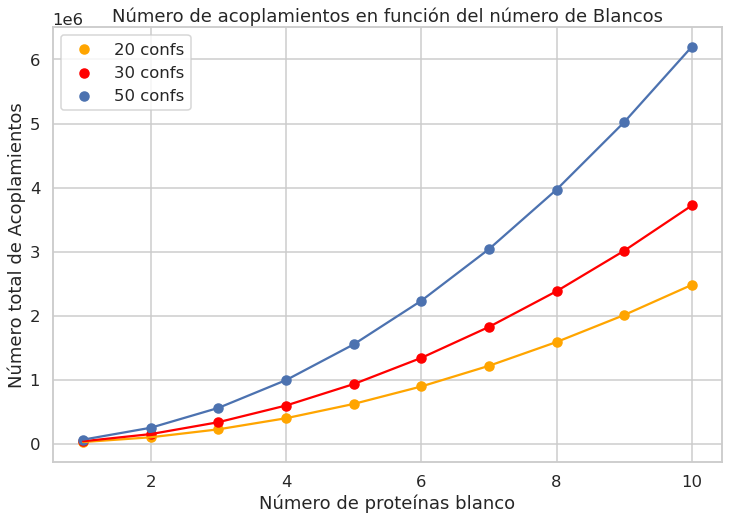

In [36]:
n_confs = 20
max_n_prots = 10

fig = plt.figure(figsize=(12,8))
n20=_plot(20, max_n_prots, c='orange')
n30=_plot(30, max_n_prots, c='red')
n50=_plot(50, max_n_prots)
plt.title(f'Número de acoplamientos en función del número de Blancos')
plt.xlabel('Número de proteínas blanco')
plt.ylabel('Número total de Acoplamientos')
plt.legend(handles=[n20, n30, n50], labels=['20 confs', '30 confs', '50 confs'])
plt.show()